In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from scipy.interpolate import make_interp_spline
df=pd.read_csv(r'Irish_DataSet\standardData2.txt',header=None,delimiter=" ")
df.rename(columns={0: "ID", 1: "Duration", 2: "Consumption"},inplace=True)

## considering only consumption column for DBSCAN

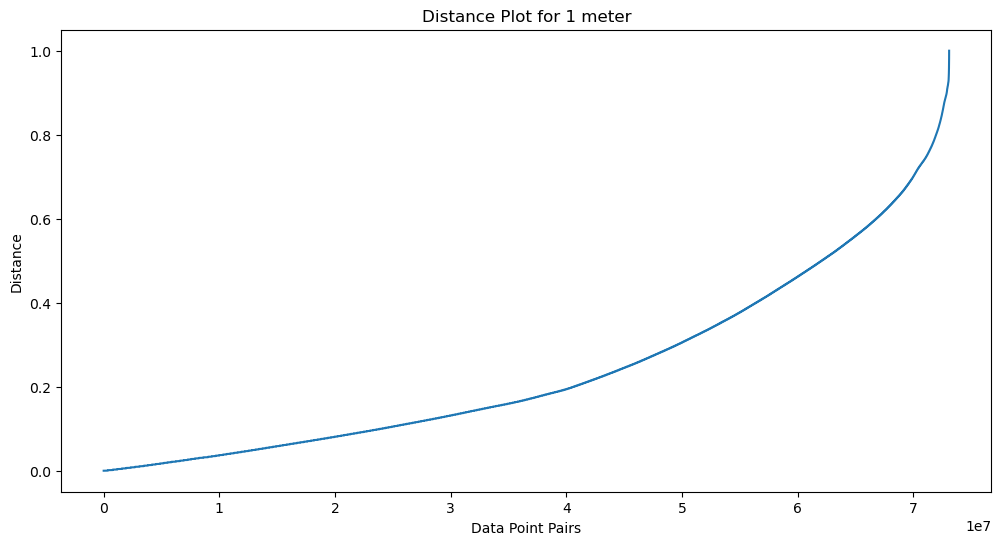

In [30]:
from sklearn.neighbors import NearestNeighbors

# Filter the data for meter numbers 1002 and 1003
# meter_data = df[df['ID'].isin([1002])]
meter_data = df.iloc[0: 8550:] #30 meters

# Extract the consumption values as a NumPy array
consumption_data1 = meter_data['Consumption'].values.reshape(-1, 1)

# Calculate the distance matrix using NearestNeighbors
# neigh = NearestNeighbors(n_neighbors=2)
# nbrs = neigh.fit(consumption_data1)
# distances, indices = nbrs.kneighbors(consumption_data1)
# distances = np.sort(distances, axis=0)
# distances = distances[:, 1]
# Plot the distance curve
# plt.figure(figsize=(12, 6))
# plt.plot(distances)
# plt.title('Distance Curve for 1 meters')
# plt.xlabel('Data Points')
# plt.ylabel('Distance')
# plt.grid(True)
# plt.show()

from sklearn.metrics.pairwise import pairwise_distances
distance_matrix = pairwise_distances(consumption_data1)
sorted_distances = np.sort(distance_matrix, axis=None)
plt.figure(figsize=(12, 6))
plt.plot(sorted_distances)
plt.xlabel('Data Point Pairs')
plt.ylabel('Distance')
plt.title('Distance Plot for 1 meter')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3976\4238442515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meter_data['Cluster'] = dbscan.fit_predict(consumption_data1)


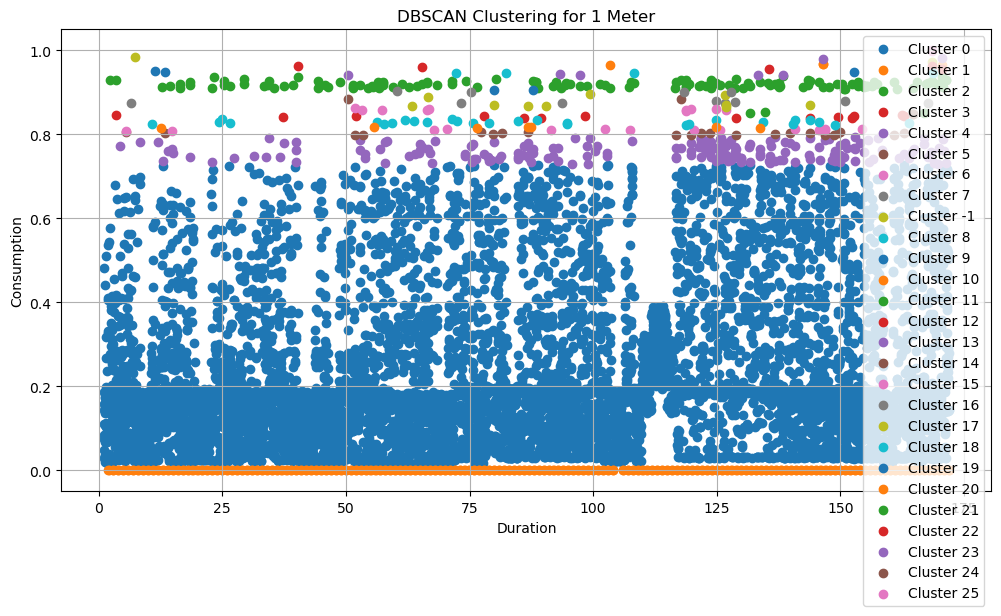

In [39]:
# Use DBSCAN to cluster the data based on the distance matrix
epsilon = 0.002 # Adjust this value based on the distance curve
dbscan = DBSCAN(eps=epsilon, min_samples=2)
meter_data['Cluster'] = dbscan.fit_predict(consumption_data1)

# Visualize the clusters
plt.figure(figsize=(12, 6))
for cluster_label in meter_data['Cluster'].unique():
    cluster_points = meter_data[meter_data['Cluster'] == cluster_label]
    plt.scatter(cluster_points['Duration'], cluster_points['Consumption'], label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering for 1 Meter')
plt.xlabel('Duration')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
silhouette_score(meter_data, meter_data['Cluster'])

-0.40081796838774864

## considering duration and consumption both for DBSCAN

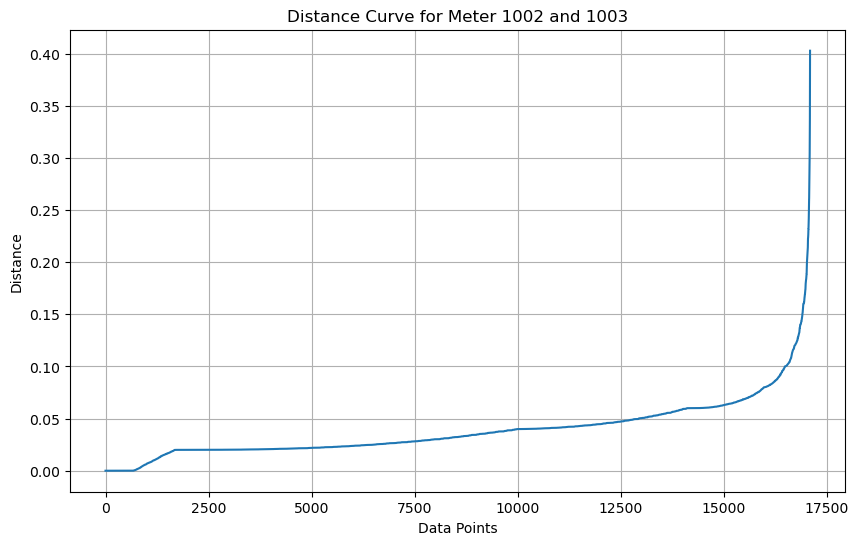

In [40]:
# Filter the data for meter numbers 1002 and 1003
meter_1002_1003_data = df[(df['ID'] == 1002) | (df['ID'] == 1003)]

# Select the columns for clustering
consumption_data2 = meter_1002_1003_data[['Duration', 'Consumption']]

# Calculate the distance matrix using NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(consumption_data2)
distances, indices = nbrs.kneighbors(consumption_data2)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot the distance curve
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Distance Curve for Meter 1002 and 1003')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3976\3663352157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meter_1002_1003_data['Cluster'] = dbscan.fit_predict(consumption_data2)


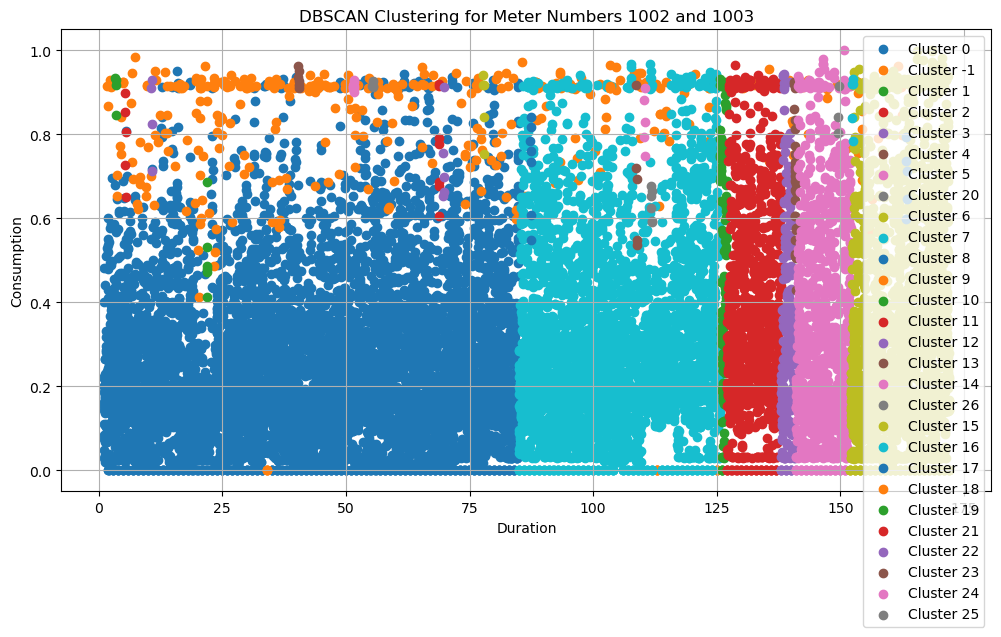

In [41]:
# Use DBSCAN to cluster the data based on the distance matrix
epsilon = 0.2 # Adjust this value based on the distance curve
dbscan = DBSCAN(eps=epsilon, min_samples=5)
meter_1002_1003_data['Cluster'] = dbscan.fit_predict(consumption_data2)

# Visualize the clusters
plt.figure(figsize=(12, 6))
for cluster_label in meter_1002_1003_data['Cluster'].unique():
    cluster_points = meter_1002_1003_data[meter_1002_1003_data['Cluster'] == cluster_label]
    plt.scatter(cluster_points['Duration'], cluster_points['Consumption'], label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering for Meter Numbers 1002 and 1003')
plt.xlabel('Duration')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()